# Introducción a la librería DEAP

![](https://deap.readthedocs.io/en/master/_images/deap_long.png)

- Fortin, F. A., De Rainville, F. M., Gardner, M. A. G., Parizeau, M., & Gagné, C. (2012). DEAP: Evolutionary algorithms made easy. The Journal of Machine Learning Research, 13(1), 2171-2175. (https://www.jmlr.org/papers/volume13/fortin12a/fortin12a.pdf)

- Documentación: https://deap.readthedocs.io/en/master/about.html

- Repositorio: https://github.com/deap/deap


#### Explorar documentación

In [5]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable


## The OneMax problem

gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

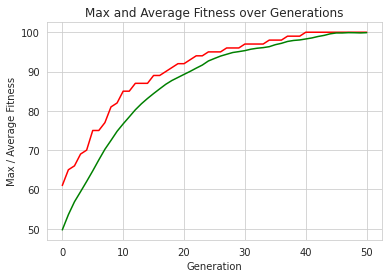

In [4]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                   stats=stats, verbose=True)


    # Genetic Algorithm is done - extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

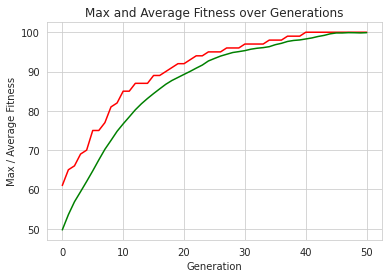

In [5]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info:
    print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    print("Best Ever Individual = ", hof.items[0])

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()

In [13]:
import numpy as np

class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self, maxcapacity=400):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = maxcapacity

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = self.maxCapacity

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))


gen	nevals	max	avg   
0  	50    	895	637.48
1  	50    	960	775.88
2  	48    	1015	830.4 
3  	46    	1032	874.34
4  	48    	1035	926.48
5  	46    	1100	965.98
6  	42    	1100	1008.74
7  	44    	1130	1044.18
8  	46    	1130	1068.22
9  	45    	1130	1075.28
10 	50    	1130	1090.24
11 	48    	1130	1100.44
12 	45    	1130	1108.2 
13 	47    	1130	1126.5 
14 	45    	1130	1117.7 
15 	46    	1130	1122.6 
16 	47    	1130	1121.6 
17 	48    	1130	1123.5 
18 	46    	1130	1121   
19 	43    	1130	1120.64
20 	46    	1130	1125.9 
21 	46    	1130	1120.1 
22 	45    	1130	1122.8 
23 	46    	1130	1127.7 
24 	44    	1130	1122.1 
25 	49    	1130	1126.5 
26 	44    	1130	1114.4 
27 	42    	1130	1118.5 
28 	44    	1130	1118.7 
29 	43    	1130	1125.14
30 	50    	1130	1125.6 
31 	46    	1130	1127.2 
32 	48    	1130	1127   
33 	46    	1130	1130   
34 	47    	1130	1121.64
35 	47    	1130	1124.2 
36 	36    	1130	1124.3 
37 	48    	1130	1116.9 
38 	45    	1130	1123.2 
39 	42    	1130	1119.7 
40 	47    	1130	1124.88
41

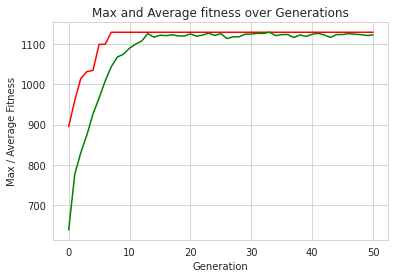

In [16]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# import knapsack

# problem constants:
# create the knapsack problem instance to be used:
knapsack = Knapsack01Problem(maxcapacity=500)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    print("-- Knapsack Items = ")
    knapsack.printItems(best)

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
import random


# Importamos los módulos relevantes de la libreria de algoritmos evolutivos 

from deap import base, creator, tools, algorithms

# Importamos este módulo independiente para implementar elitismo, adjunto en la carpeta fuente. 


In [89]:
# This is the original elitism module.

from deap import tools
from deap import algorithms


def elitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook


In [90]:
def polynomial(x):
    y =  - x**6/60 - x**5/50 + x**4/2 + 2*x**3/3 - 3.2*x**2 - 6.4*x
    return -y

def rational(x):
    y = -(x**6 + x**5 - 10*x**2 - 10*x - 12)/(x**2 + 6)
    return y

def irrational(x):
    y = 5 - np.sqrt(x**4 + 2*x**3 - 3*x**2 + 13)
    return y

def trigonometric(x):
    y =  np.sin(3*x + 45)**2 + 0.9*np.sin(9*x)**3 - np.sin(15*x + 50) - np.cos(2*x - 30)
    return y

def asymptoteV(x):
    if -0.05 <= x <= 0.05:   # Para evitar la discontinuidad, definimos un valor "razonable"
        y = 0
    else:
        y = (np.sin(2*np.pi*x) - np.cos(3*np.pi*x))/x
    return y

def asymptoteH(x):
    if -0.05 <= x <= 0.05:  
        y = -16               # Para evitar la discontinuidad
    else:
        y = (2*x - 1)/(x**2)
    return y

def logarithmic(x):
    y = -x**4*(np.log(abs(x)) - 1)
    return y

def exponential(x):
    if -0.01 <= x <= 0.01:
        y = -10                 # Para evitar la discontinuidad
    else:
        y = np.exp(-x)*(np.log(abs(x)) + x/(abs(x)))
    return y

In [91]:
fun = np.vectorize(lambda x: polynomial(x)) # Elegir alguna función de arriba.

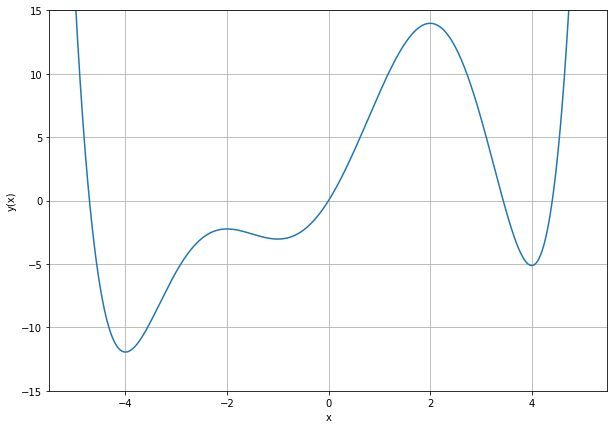

In [92]:
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun(xs))
plt.show()

In [93]:
x = -3.6  # Este valor inicial se puede modificar. Se sugiere cambiarlo para experimentar.
result = minimize(fun, x, bounds = [(-5., 5.)]) # Ajustar los límites, según la función a trabajar.
x_min = result.x
y_min = result.fun

print("Convergencia: ", result.success)
print("X_min = ", x_min)
print("Y_min = ", y_min)

# El método anterior sirve para obtener el mínimo. ¿Cómo obtenemos el máximo de la función?

Convergencia:  True
X_min =  [-4.00000004]
Y_min =  -11.94666666666662


## DEAP

In [94]:
# Constantes del problema:
DIMENSIONS = 1  # Número de dimensiones 
BOUND_LOW, BOUND_UP = -4.0, 4.0  # Ajustar los límites de la variable independiente

In [95]:
# Parámetros del algoritmo:
POPULATION_SIZE = 10 # A mayor cantidad, mejor desempeño pero mayor cómputo
P_CROSSOVER = 0.8  # Probabilidad de cruza: 0.8 es valor típico
P_MUTATION = 0.3   # Probabilidad de mutación individual, puede ser entre 0.1 y 0.5.
MAX_GENERATIONS = 50  # A mayor cantidad, mejor desempeño pero mayor cómputo
HALL_OF_FAME_SIZE = 1 # Cantidad de mejores individuos que pasan íntegramente a la siguiente generación 
CROWDING_FACTOR = 20.0  # factor no relevante en todas las técnicas

In [96]:
# Para fijar la población inicial:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [97]:
toolbox = base.Toolbox() # Herramienta estructural de DEAP

Las siguientes instrucciones generales crean nuevas clases en DEAP. Correr una sola vez para evitar dificultades

In [98]:
# Define la estrategia de optimización:
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Para hallar máximo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Para hallar mínimo

In [99]:
# Crea la clase individuos:
#creator.create("Individual", list, fitness=creator.FitnessMax)
creator.create("Individual", list, fitness=creator.FitnessMin)

In [100]:
# Crea poblaciones como números aleatorios distribuidos entre las mismas fronteras
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

In [101]:
# Crea un flotante a partir de lo anterior.
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [102]:
# Crea un individo, a partir de lo anterior.
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [103]:
# Crea una población de individuos:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [104]:
# Evalua la función elegida
toolbox.register("evaluate", fun) # Actualizar esta celda cada que se elija una nueva función

In [105]:
# Operadores genéticos:
toolbox.register("select", tools.selTournament, tournsize=2) # Selección por torneo de tamaño 2
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, 
                 eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

In [108]:
def main():

    # Crea la población inicial (generación 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # Guarda datos estadísticos:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
#    stats.register("max", np.max)   # Elegir cuando se busque maximizar
    stats.register("min", np.min)   # Elegir cuando se desee minimizar
    stats.register("avg", np.mean)

    # Define el Salón de la fama para implementar elitismo:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # Incorpora elitismo en el AG:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # Imprime la mejor solución encontrada:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # Estrae los datos estadísticos:
    gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")

    return population, logbook, hof

gen	nevals	min     	avg      
0  	10    	-11.9092	0.0398575
1  	9     	-11.9092	-4.15165 
2  	9     	-11.9467	-7.20567 
3  	6     	-11.9467	-9.70682 
4  	5     	-11.9467	-11.7225 
5  	6     	-11.9467	-11.7331 
6  	6     	-11.9467	-11.8507 
7  	7     	-11.9467	-11.9467 
8  	6     	-11.9467	-11.9096 
9  	7     	-11.9467	-11.9467 
10 	4     	-11.9467	-11.9467 
11 	9     	-11.9467	-11.7302 
12 	9     	-11.9467	-11.6458 
13 	6     	-11.9467	-11.7069 
14 	6     	-11.9467	-11.7706 
15 	6     	-11.9467	-11.7754 
16 	8     	-11.9467	-11.9467 
17 	8     	-11.9467	-11.9467 
18 	6     	-11.9467	-11.9467 
19 	7     	-11.9467	-11.9281 
20 	9     	-11.9467	-10.8529 
21 	5     	-11.9467	-11.7336 
22 	8     	-11.9467	-11.2393 
23 	8     	-11.9467	-11.9467 
24 	9     	-11.9467	-11.3177 
25 	8     	-11.9467	-11.9454 
26 	7     	-11.9467	-11.6833 
27 	7     	-11.9467	-11.7006 
28 	8     	-11.9467	-11.7735 
29 	6     	-11.9467	-11.7267 
30 	8     	-11.9467	-11.7713 
31 	8     	-11.9467	-11.6759 
32 	6     

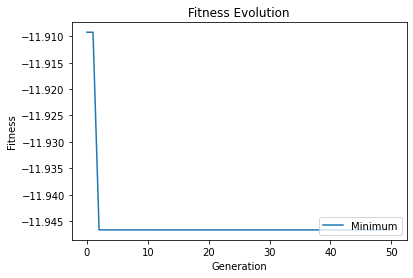

In [109]:
# Llama al flujo principal y muestra los resultados

if __name__ == "__main__":
    pop, log, hof = main()
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    
    best = hof.items[0]
    
    plt.figure()
    plt.plot(gen, min_, label="Minimum") # Elegir para mostrar la evolución del mejor fitness al minimizar
#    plt.plot(gen, max_, label="Maximum") # Elegir para mostrar la evolución del mejor fitness al maxmizar
#    plt.plot(gen, avg, label="Average") # Elegir para mostrar la evolución del promedio del fitness
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

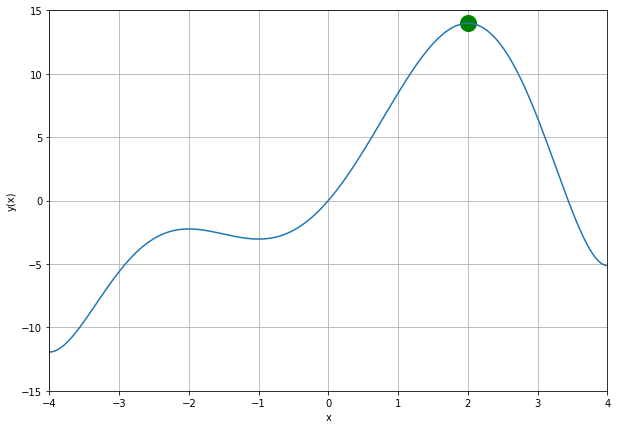

In [110]:
ysol = polynomial(2.0000041694948036)
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.xlim(-4,4)
plt.plot(2.0000041694948036, ysol, marker='o', c='green', markersize=16)
plt.plot(xs, fun(xs))
plt.savefig("max_genetic.png")
plt.show()